# Multilayer Perceptron

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)

epochs = 200
learning_rate = 0.5
hidden_layer_size = 32
num_classes = 10

In [3]:
def load_dataset():
    pickle_file = 'mnist.pkl'
    with open(pickle_file, 'rb') as f:
        train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

    return train_set[0], train_set[1], test_set[0], test_set[1]

In [4]:
def relu(value):
    return np.maximum(0, value)

def relu_deriv(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

def softmax(x):
    exp = np.exp(x)
    return exp / np.sum(exp, axis=1, keepdims=True)

def softmax_deriv(z, i, j):
    return softmax(z,i) * (1 - softmax(z, i)) if i == j else - softmax(z, i) * softmax(z, j)

def one_hot(val, classes):
    one_hot = np.zeros(classes)
    one_hot[val] = 1
    return one_hot

def cross_entropy_loss(y_pred, y_true):
    logprobs = y_true * np.log(y_pred)
    cost = - (1.0 / y_true.shape[0]) * np.sum(logprobs)
    return cost

In [5]:
def show_samples(x_set, y_set):
    x_set_initial = np.dot(x_set, 255)
    size = x_set.shape[0]

    fig, ax = plt.subplots(size // 4, 4, figsize=(20, 10))
    for k in range(size):
        row, col = k // 4, k % 4

        # Make those columns into a array of 8-bits pixels
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(x_set_initial[k], dtype='uint8')

        # Reshape the array into 28 x 28 array (2-dimensional array)
        n = int(np.sqrt(len(pixels)))
        assert n ** 2 == len(pixels)
        pixels = pixels.reshape(n, n)
        ax[row, col].imshow(pixels, cmap='gray')
        ax[row, col].set_title('Eticheta {label}'.format(label=y_set[k]))
        ax[row, col].axis('off')

    plt.show()

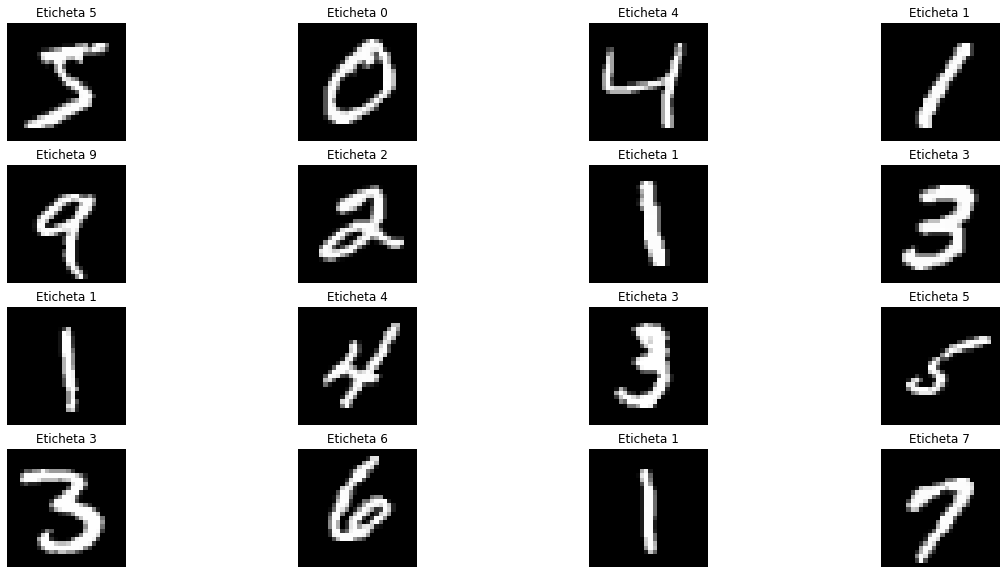

In [6]:
train_set_x, train_set_y, test_set_x, test_set_y  = load_dataset()
y = np.array([one_hot(train_set_y[i], num_classes) for i in range(train_set_y.size)])
show_samples(train_set_x[:16], train_set_y[:16])

# Forward propagation

$z_1 = x W_1^T + b_1$

$a_1 = relu(z_1)$

$z_2 = a_1 W_2^T + b_2$

$a_2 = softmax(z_2)$

In [7]:
def forward_prop(set_x, W1, b1, W2, b2):
    
    z1 = np.matmul(set_x, W1.T) + b1
    a1 = relu(z1)
    z2 = np.matmul(a1, W2.T) + b2
    a2 = softmax(z2)
    
    cache = (set_x, a1, a2)
    return a2, cache

# Back propagation

$\frac{\partial H}{\partial z^{(2)}} = \delta^{(2)} = \frac{1}{n} (a^{(2)} - \hat y) $

$\frac{\partial H}{\partial W^{(2)}} =  (\delta^{(2)})^T a_1$

$\frac{\partial H}{\partial b^{(2)}} = \sum^n_{i = 1} \delta^{(2)}_i$

$\frac{\partial H}{\partial z^{(1)}} = \delta^{(1)} = \delta^{(2)}  W^{(2)}  relu(z^{(1)})' $

$\frac{\partial H}{\partial W^{(1)}} = (\delta^{(1)})^T x$

$\frac{\partial H}{\partial b^{(1)}} = \sum^n_{i = 1} \delta^{(1)}_i$

In [8]:
def compute_grads(cache, y):
    x, a1, a2 = cache
    
    delta2 = (1.0 / train_set_x.shape[0]) * (a2 - y)
    dw2 = np.matmul(delta2.T, a1)
    db2 = np.sum(delta2, axis=0, keepdims=True)
    
    delta1 = np.matmul(delta2, W2) * relu_deriv(a1)

    dw1 = np.matmul(delta1.T, x)
    db1 = np.sum(delta1, axis=0, keepdims=True)
    
    return dw2, db2, dw1, db1

In [9]:
def back_prop(cache, y, W2, b2, W1, b1):
    grads = compute_grads(cache, y)

    W2 = W2 - learning_rate * grads[0]
    b2 = b2 - learning_rate * grads[1]
    W1 = W1 - learning_rate * grads[2]
    b1 = b1 - learning_rate * grads[3]
    
    return W2, b2, W1, b1

In [10]:
def accuracy(y_pred, y_true):
    y_pred = np.argmax(y_pred, axis=1)
    accuracy = ((y_pred == y_true).sum() * 100) / y_true.shape[0]
    return accuracy

# Train

## Stochastic Gradient Descent

In [11]:
W1 = np.random.normal(0, 0.001, (hidden_layer_size, train_set_x.shape[1]))
b1 = np.zeros(hidden_layer_size)
W2 = np.random.normal(0, 0.001, (num_classes, hidden_layer_size))
b2 = np.zeros(num_classes)

In [46]:
for epoch in range(epochs):

    out, cache = forward_prop(train_set_x, W1, b1, W2, b2)

    loss = cross_entropy_loss(out, y)

    W2, b2, W1, b1 = back_prop(cache, y, W2, b2, W1, b1)

    print("Loss at epoch {}: {}".format(epoch + 1, loss))

Loss at epoch 1: 2.3025902277787993
Loss at epoch 2: 2.3024251322996294
Loss at epoch 3: 2.302275072915765
Loss at epoch 4: 2.3021363409720594
Loss at epoch 5: 2.3020053519108883
Loss at epoch 6: 2.3018780037936417
Loss at epoch 7: 2.3017489839741088
Loss at epoch 8: 2.3016109904183235
Loss at epoch 9: 2.3014532954361355
Loss at epoch 10: 2.3012598600648078
Loss at epoch 11: 2.3010064488522928
Loss at epoch 12: 2.3006553324246064
Loss at epoch 13: 2.300147600559356
Loss at epoch 14: 2.299391335015809
Loss at epoch 15: 2.2982430718131783
Loss at epoch 16: 2.296479825335382
Loss at epoch 17: 2.2937589551447726
Loss at epoch 18: 2.289565397787065
Loss at epoch 19: 2.283153040972933
Loss at epoch 20: 2.2735094676399394
Loss at epoch 21: 2.259410584511397
Loss at epoch 22: 2.239672215984713
Loss at epoch 23: 2.213652090369051
Loss at epoch 24: 2.1816817373223327
Loss at epoch 25: 2.1447459416475243
Loss at epoch 26: 2.103085440528422
Loss at epoch 27: 2.0551986514979594
Loss at epoch 28: 1.

In [47]:
pred, _ = forward_prop(test_set_x,  W1, b1, W2, b2)

In [48]:
test_accuracy = accuracy(pred, test_set_y)
print("Test accuracy: {}%".format(test_accuracy))

Test accuracy: 91.9%


## Batch Gradient Descent

In [12]:
W1 = np.random.normal(0, 0.001, (hidden_layer_size, train_set_x.shape[1]))
b1 = np.zeros(hidden_layer_size)
W2 = np.random.normal(0, 0.001, (num_classes, hidden_layer_size))
b2 = np.zeros(num_classes)

batch_size = 20

In [14]:
for epoch in range(epochs):

    perm = np.random.permutation(train_set_x.shape[0])
    
    x_batches = [train_set_x[perm[index : index + batch_size]] 
                 for index in range(0, train_set_x.shape[0], batch_size)]
    y_batches = [y[perm[index : index + batch_size]] for index in range(0, train_set_x.shape[0], batch_size)]

    for (batch_x, batch_y) in zip(x_batches, y_batches):
        out, cache = forward_prop(batch_x, W1, b1, W2, b2)
        W2, b2, W1, b1 = back_prop(cache, batch_y, W2, b2, W1, b1)
        
    out, _ = forward_prop(train_set_x, W1, b1, W2, b2)
    loss = cross_entropy_loss(out, y)

    print("Train loss at epoch {}: {}".format(epoch + 1, loss))

Train loss at epoch 1: 2.3021153915245605
Train loss at epoch 2: 2.3019672460723855
Train loss at epoch 3: 2.3018111841595736
Train loss at epoch 4: 2.3016357992124186
Train loss at epoch 5: 2.3014239257461457
Train loss at epoch 6: 2.301147392315042
Train loss at epoch 7: 2.300763563054119
Train loss at epoch 8: 2.3002026114008527
Train loss at epoch 9: 2.2993521345075045
Train loss at epoch 10: 2.298029784568725
Train loss at epoch 11: 2.295941617597507
Train loss at epoch 12: 2.292617410537498
Train loss at epoch 13: 2.2873239660939855
Train loss at epoch 14: 2.2789604150882417
Train loss at epoch 15: 2.265989103042924
Train loss at epoch 16: 2.2465089692469373
Train loss at epoch 17: 2.2185874512945563
Train loss at epoch 18: 2.180677763980134
Train loss at epoch 19: 2.131811852144464
Train loss at epoch 20: 2.070958090082755
Train loss at epoch 21: 1.997128936836197
Train loss at epoch 22: 1.9105586842265136
Train loss at epoch 23: 1.8138270379603862
Train loss at epoch 24: 1.7115

Train loss at epoch 190: 0.3169885140497264
Train loss at epoch 191: 0.3164169304766788
Train loss at epoch 192: 0.31587568473131133
Train loss at epoch 193: 0.3153261528726173
Train loss at epoch 194: 0.3147956443613012
Train loss at epoch 195: 0.31424430188356245
Train loss at epoch 196: 0.3137000233752903
Train loss at epoch 197: 0.3131664507228876
Train loss at epoch 198: 0.31265277621238563
Train loss at epoch 199: 0.31211797437975364
Train loss at epoch 200: 0.3115726782220559


In [16]:
pred, _ = forward_prop(test_set_x,  W1, b1, W2, b2)

In [17]:
test_accuracy = accuracy(pred, test_set_y)
print("Test accuracy: {}%".format(test_accuracy))

Test accuracy: 91.36%
